# Anisha Mishra

# Task-4: To perform Exploratory Data Analysis

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’.
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. 
What all business problems you can derive by looking into the data?

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head(5)
# To display the top 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring and cleaning the data

In [3]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
duplicate_rows = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (17, 13)


In [13]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Starting the Exploratory Data Analysis 

In [17]:
data['Country'].head()


0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country, dtype: object

In [19]:
data['Country'].unique()

array(['United States'], dtype=object)

In [20]:
data['City'].value_counts().count()


531

In [33]:
len((data['State'].unique()))


49

In [36]:
category_sales=data.groupby('Category').sum()
display(category_sales)

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


In [38]:
category_sales['S%']=(category_sales.Sales/category_sales.Sales.sum())*100
category_sales['P%']=(category_sales.Profit/category_sales.Profit.sum())*100


print(' ')
print('Total sales % by Technology is {:.2F}% and profit % is {:.2F}% '.format(category_sales['S%'][2],category_sales['P%'][2]))
print('Total sales % by Furniture is {:.2F}% and profit % is {:.2F}% '.format(category_sales['S%'][0],category_sales['P%'][0]))
print('Total sales % by Office Supplies is {:.2F}% and profit % is {:.2F}% '.format(category_sales['S%'][1],category_sales['P%'][1]))

 
Total sales % by Technology is 36.40% and profit % is 50.79% 
Total sales % by Furniture is 32.30% and profit % is 6.44% 
Total sales % by Office Supplies is 31.30% and profit % is 42.77% 


In [129]:
Subcategory_sales=data.groupby('Sub-Category').sum()
display(Subcategory_sales)

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,44468434,167380.3180,2976,60.80,41936.6357
Appliances,25250538,107532.1610,1729,77.60,18138.0054
Art,43329658,27118.7920,3000,59.60,6527.7870
Binders,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,12771539,114879.9963,868,48.14,-3472.5560
Chairs,34936229,328449.1030,2356,105.00,26590.1663
Copiers,3873477,149528.0300,234,11.00,55617.8249
Envelopes,13325731,16476.4020,906,20.40,6964.1767
Fasteners,12506063,3024.2800,914,17.80,949.5182


Text(0.5, 1.0, 'Sales and Profits for each Sub-Category')

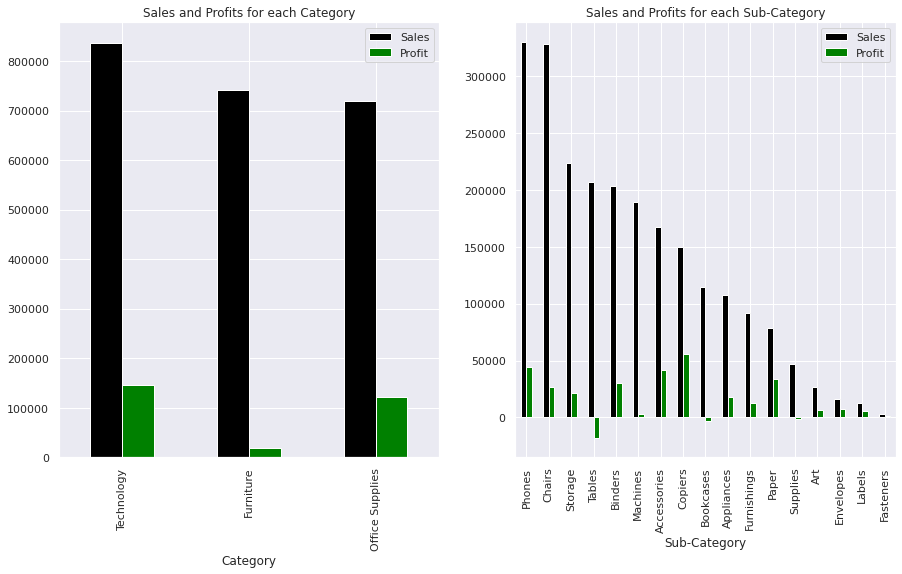

In [65]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Category")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax1)
ax1.set_title("Sales and Profits for each Category")
data.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax2)
ax2.set_title("Sales and Profits for each Sub-Category")



#### In Plot 1, we can see:
The maximum profit is for category Technology with sales around 741K
and the minimum Profit is for category Furniture with sales around 836K
#### In Plot 2, we can see:
The maximum profit is for subcategory Copies with sales nearly 150K
and the profit is negative for sub category Tables with sales nearly 206K

In [130]:
Seg_sales=data.groupby('Segment').sum()
display(Seg_sales)

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


Text(0.5, 1.0, 'Sales and Profits for each Segment')

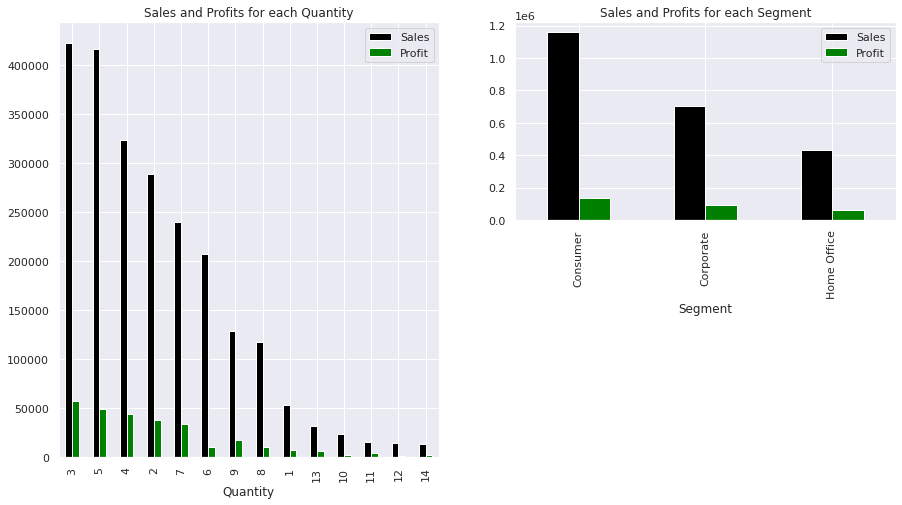

In [63]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
data.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax1)
ax1.set_title("Sales and Profits for each Quantity")
data.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax2)
ax2.set_title("Sales and Profits for each Segment")

#### In Plot 1, we can see:
The sales is maximum for lesser quantities and so is the profit.
#### In Plot 2, we can see:
The maximum profit is for Segment consumer for maximum sales and the profit is minimum for segment Home office with minimum sales amongst the segment.

Text(0.5, 1.0, 'Sales and Profits for each Region')

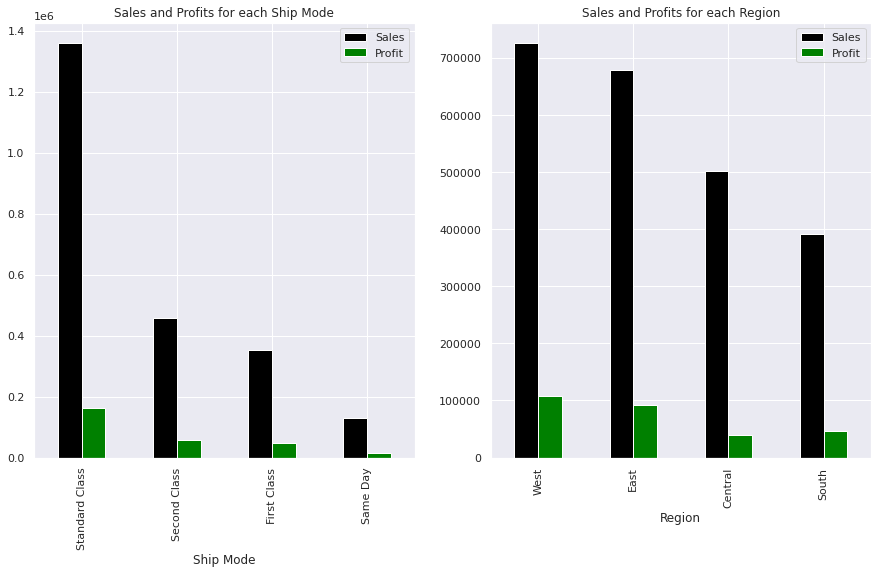

In [64]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax1)
ax1.set_title("Sales and Profits for each Ship Mode")
data.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "green"],ax=ax2)
ax2.set_title("Sales and Profits for each Region")



#### In plot 1 we see, 
The maximum sales is using the standard class Ship mode giving maximum profits.
#### In plot 2 we see, 
The maximum sales is more than 700K for the West region and Profit is maximum in this region.
The minimum profit is present in the Cdentral region where sales is comparatively higher than the south region that has more profit that the central region.

Text(0.5, 1.0, 'Sales and Profits for each State')

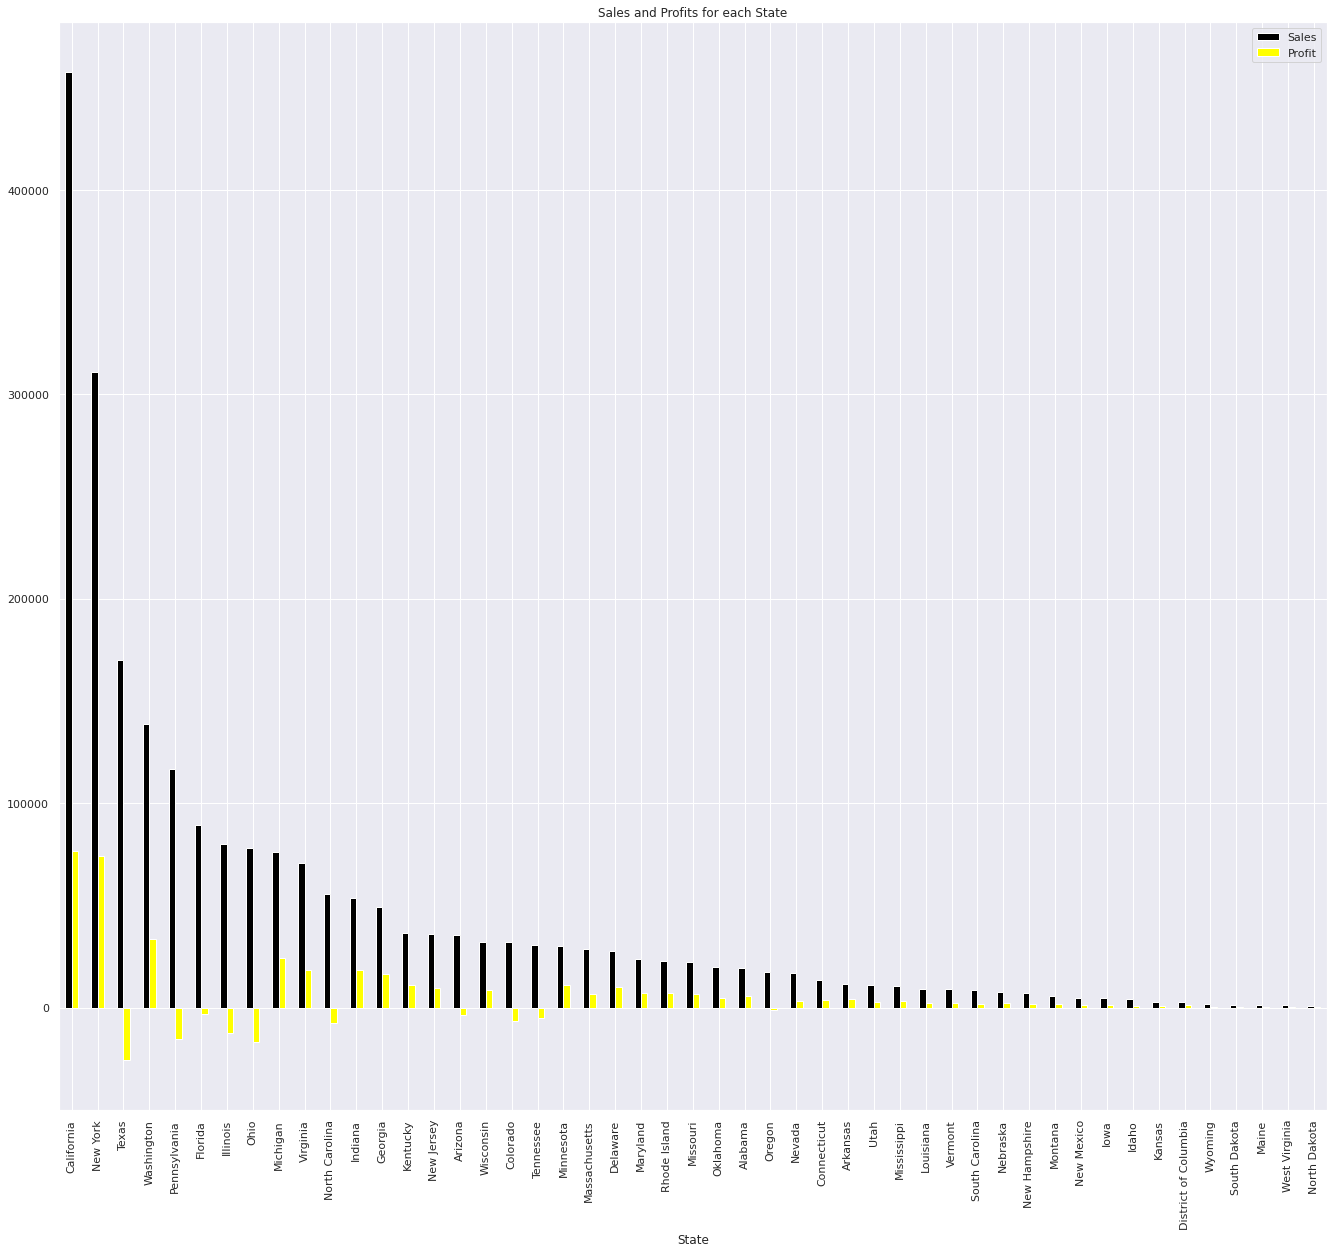

In [71]:
fig=plt.figure(figsize=(50,20))
ax1=fig.add_subplot(121)
data.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","yellow"],ax=ax1)
ax1.set_title("Sales and Profits for each State")


#### Here we observe,
for cities including Texas,Pennsylvania, Florida, Illinois, Ohio, North Carolina and few other states have high sales with negative profits.

In [79]:
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.64
Pennsylvania            192.90
Illinois                191.90
Ohio                    152.40
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.80
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

#### By comparing the barplot and the above dataframe, we can observe that the states that are offered high discounts are generating less profits.

In [81]:
states_data = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_data

,Sales,Profit,Discount
State,,,
California,457687.6315,76381.3871,145.60
New York,310876.2710,74038.5486,62.40
Texas,170188.0458,-25729.3563,364.64
Washington,138641.2700,33402.6517,32.40
Pennsylvania,116511.9140,-15559.9603,192.90
Florida,89473.7080,-3399.3017,114.65
Illinois,80166.1010,-12607.8870,191.90
Ohio,78258.1360,-16971.3766,152.40
Michigan,76269.6140,24463.1876,1.80


In [75]:
states_data['Discount'][states_data['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.80
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.40
Illinois          191.90
Pennsylvania      192.90
Texas             364.64
Name: Discount, dtype: float64

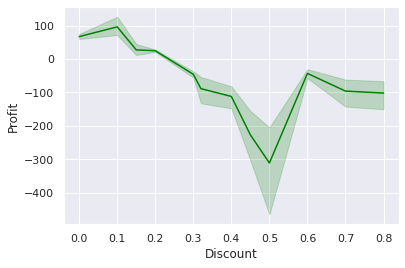

In [76]:
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "green")
plt.show()

#### OBSERVATION: We can clearly observe that the discount has a negative relation with Profit i.e. as the discount is increasing the Profit generated is decreased.

In [82]:
data['Category'].describe()



count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [92]:
cat_data = data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by = "Sales",ascending = False)


display(cat_data)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [91]:
data['Category'].value_counts()



Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [93]:
data['Segment'].describe()



count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

Text(0.5, 1.0, 'Sales in terms of Categories in different Regions')

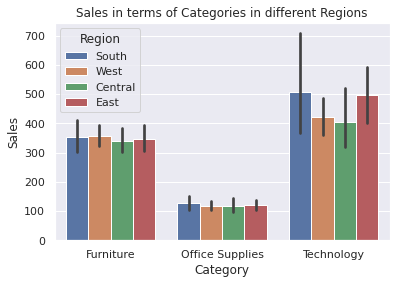

In [94]:
### In terms of Sales
sns.barplot(x='Category',y='Sales',hue='Region',data=data)
plt.title("Sales in terms of Categories in different Regions")

We can see from the graph, the sales of Furniture is done maximum in "Western Region" nearly about 360k+, after that, the sales of "Office Supplies" is maximum done in South region nearly about 150k+ and the sales of "Technology" is maximum done in South Region nearly about 550k+. Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in South region.

Text(0.5, 1.0, 'Categories wise sales in different Shipmode')

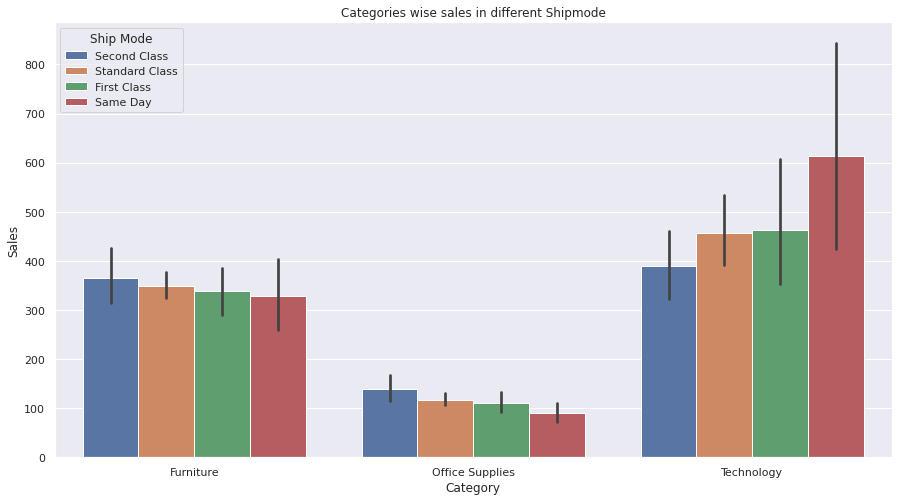

In [95]:
### In terms of Sales
plt.figure(figsize=(15,8))
sns.barplot(x="Category",y="Sales",data=data,hue="Ship Mode")
plt.title("Categories wise sales in different Shipmode")


#### As you can see, Sale of "Technology" has done maximum on same day ship mode while it is least in second class ship mode.

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

### Taking a look at data with respect to negative profits



In [118]:
Negative_profits=data.loc[data.Profit <= 0].reset_index(drop=True)
Negative_profits.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
2,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
3,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
5,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.6180,2,0.70,-7.0532
6,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,6.8580,6,0.70,-5.7150
7,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
8,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
9,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470


In [117]:
Negative_profits["Category"].value_counts()

Office Supplies    915
Furniture          747
Technology         274
Name: Category, dtype: int64

In [119]:
by_cat=Negative_profits.groupby('Category').sum().sort_values(by='Profit').reset_index()
by_cat.head()

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,44482276,276882.8338,2777,270.04,-60936.1090
1,Office Supplies,50008197,100058.2830,3536,547.40,-56615.2585
2,Technology,13762866,119452.8850,982,90.60,-38579.9182


Text(0.5, 1.0, 'Negative Profit by Category')

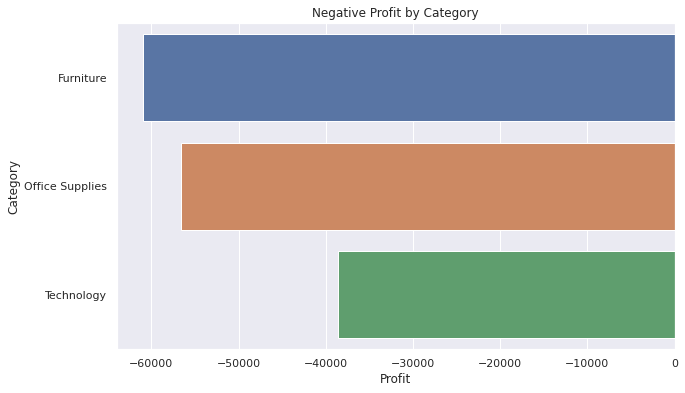

In [125]:
plt.subplots(figsize=(10,6))
sns.barplot(y=by_cat.Category,x=by_cat.Profit)
plt.title("Negative Profit by Category")

Text(0.5, 1.0, 'Negative Profits for each Category')

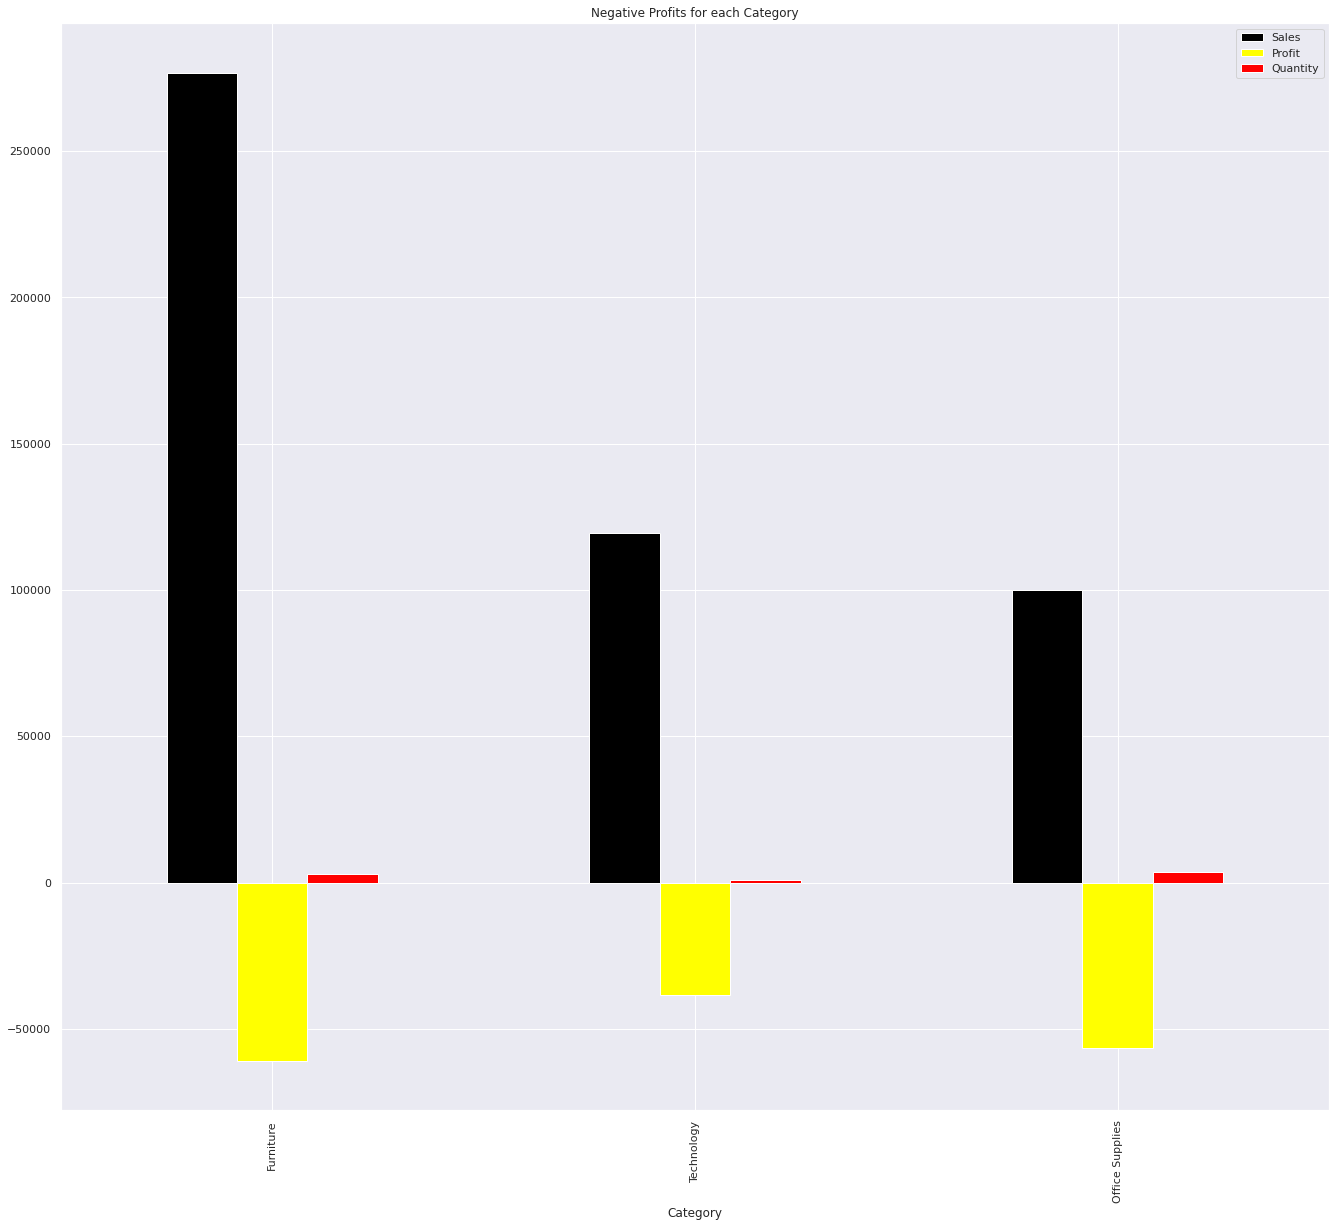

In [124]:
fig=plt.figure(figsize=(50,20))
ax1=fig.add_subplot(121)
Negative_profits.groupby("Category")[["Sales","Profit","Quantity"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","yellow","red"],ax=ax1)
ax1.set_title("Negative Profits for each Category")



From the above two bar plots, we observe that sales which are maximum nearly 276K is causing the most negative profits nearly -60K

In [128]:
by_city=Negative_profits.groupby('City').sum().sort_values(by='Profit').reset_index()
by_city.head()


,City,Postal Code,Sales,Quantity,Discount,Profit
0,Philadelphia,4860267,72620.3450,910,116.30,-19590.7411
1,Houston,14410580,38565.3744,691,104.74,-14785.3668
2,Chicago,9518725,20637.1860,550,88.80,-11120.6271
3,San Antonio,2659038,17952.7300,144,17.40,-7831.0254
4,Lancaster,701506,7870.0280,72,9.70,-7632.4946


Text(0.5, 1.0, 'Top 5 Cities with most negative profit')

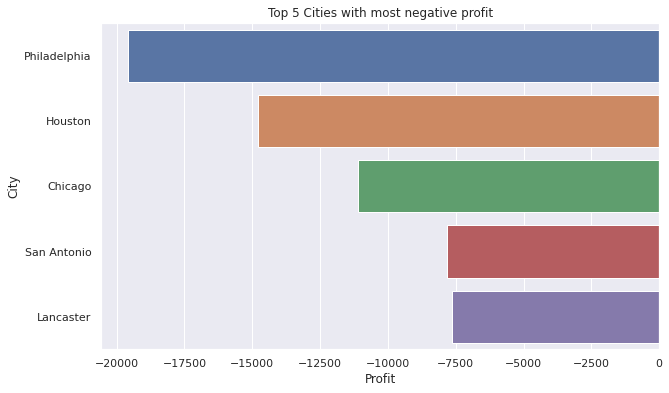

In [127]:

plt.subplots(figsize=(10,6))
sns.barplot(y=by_city.head().City,x=by_city.head().Profit)
plt.title("Top 5 Cities with most negative profit")

As you can see, Philadelphia and New York City has the most negative profit sales.

Philadelphia having a total negative profit sales of -$5,156.89.

New York City having a total negative profit sales of -\$3,936.74.

## Insights Drawn from Analysing the SampleSuperstore data:

1) The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.

2) The profits for the Office Supplies is high, but the sales of the Office Supplies is less. So, we should focus on increasing the sales for Office Supplies.

3) The ship Mode which is Maximum use by customers are Same day and they are doing maximum sales but do not making any much profit. So we receive maximum profit and sales with Standard class ship mode and hence this mode should be used highly.

4) The company is facing Loss in top 25 states with highest number of sales.

5) The states with high Sales are generating less profit due to high discount allowance.

6) Discount is neagtively related to the Profit. This is be noted when a discount is being allowed on the products.

7) The maximum profit is for Segment consumer for maximum sales hence growth must be increased in this segment

8) The maximum sales is more than 700K for the West region and Profit is maximum in this region so we continue to grow the sales in west region. The minimum profit is present in the Cdentral region where sales is comparatively higher than the south region that has more profit that the central region. Hence sales must be increased in south region as compared to central region for maximum profit.

9) States with maximum sales have minimum profits with few giving rise to negative profits, hence more focus dhould be put on increases the sales in the states where sales is minimum in the current scenario, to gain more profit.

